In [26]:
%%latex
When light with wavelength $\lambda$ passes through the lens on a telescope (with unit radius) it diffractions and creates a circular diffraction pattern. The intensity is given by 
\begin{equation*}
    I(r) = (\frac{J_1(kr)}{kr})^2
\end{equation*}
where $r$ is the distance in the focal plane from the center, $k = 2\pi/\lambda$, and $J_1(x)$ is the Bessel function given by 
\begin{equation*}
    J_m(x) = \frac{1}{\pi}\int_0^\pi \cos(m\theta-x\sin\theta)d\theta
\end{equation*}
where $m$ is a non-negative integer and $x \geq 0$.

<IPython.core.display.Latex object>

In [27]:
%matplotlib notebook

import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import numpy as np

wavelength = 500e-9

In [28]:
def simpsonsrule(f, a, b, N=1000):
    h = (b - a) / N
    return 1/3 * h * (f(a) + f(b) + 4 * sum([f(a + (2*k - 1) * h) for k in range(1, int(N/2) + 1)]) + 2 * sum([f(a + 2 * k * h) for k in range(1, int(N/2))]))

In [29]:
def J(m, x):
    return 1/math.pi * simpsonsrule(lambda theta: math.cos(m * theta - x * math.sin(theta)), 0, math.pi)

In [30]:
def I(r):
    k = 2 * math.pi / wavelength
    return (J(1, k * r) / (k * r)) ** 2

In [31]:
def plot(f, a, b):
    x = np.arange(a, b, 0.01)
    y = np.array(list(map(f, x)))
    plt.plot(x,y)
    plt.show()

In [32]:
def plot3d(f, a, b):
    fig = plt.figure()
    ax = Axes3D(fig)
    x = y = np.arange(a, b, 0.01)
    X, Y = np.meshgrid(x, y)
    zs = np.array(f(np.ravel(X), np.ravel(Y)))
    Z = zs.reshape(X.shape)

    
    cset = ax.contour(X, Y, Z, 16, extend3d=True)
    ax.clabel(cset, fontsize=9, inline=1)
    
#     ax.plot_surface(X, Y, Z)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

<IPython.core.display.Javascript object>


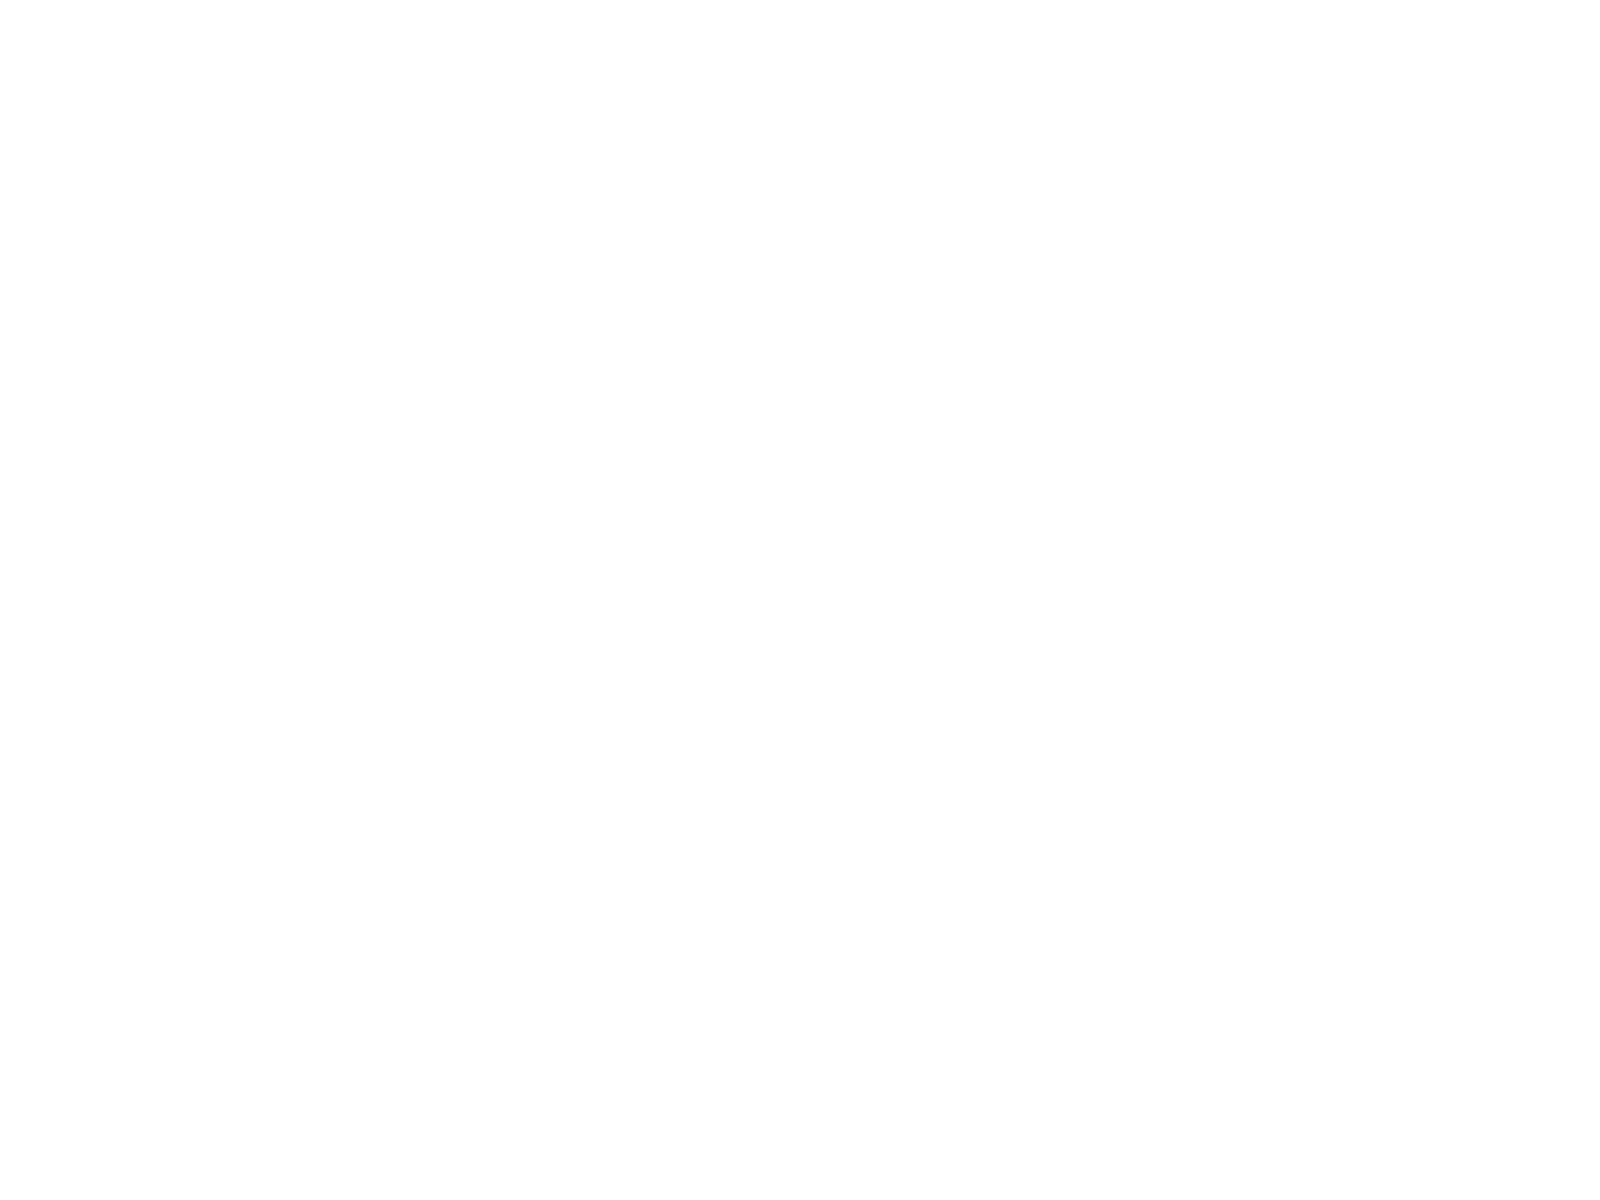

In [33]:
plot(lambda x: J(0, x), 0, 20)
plot(lambda x: J(1, x), 0, 20)
plot(lambda x: J(2, x), 0, 20)

<IPython.core.display.Javascript object>


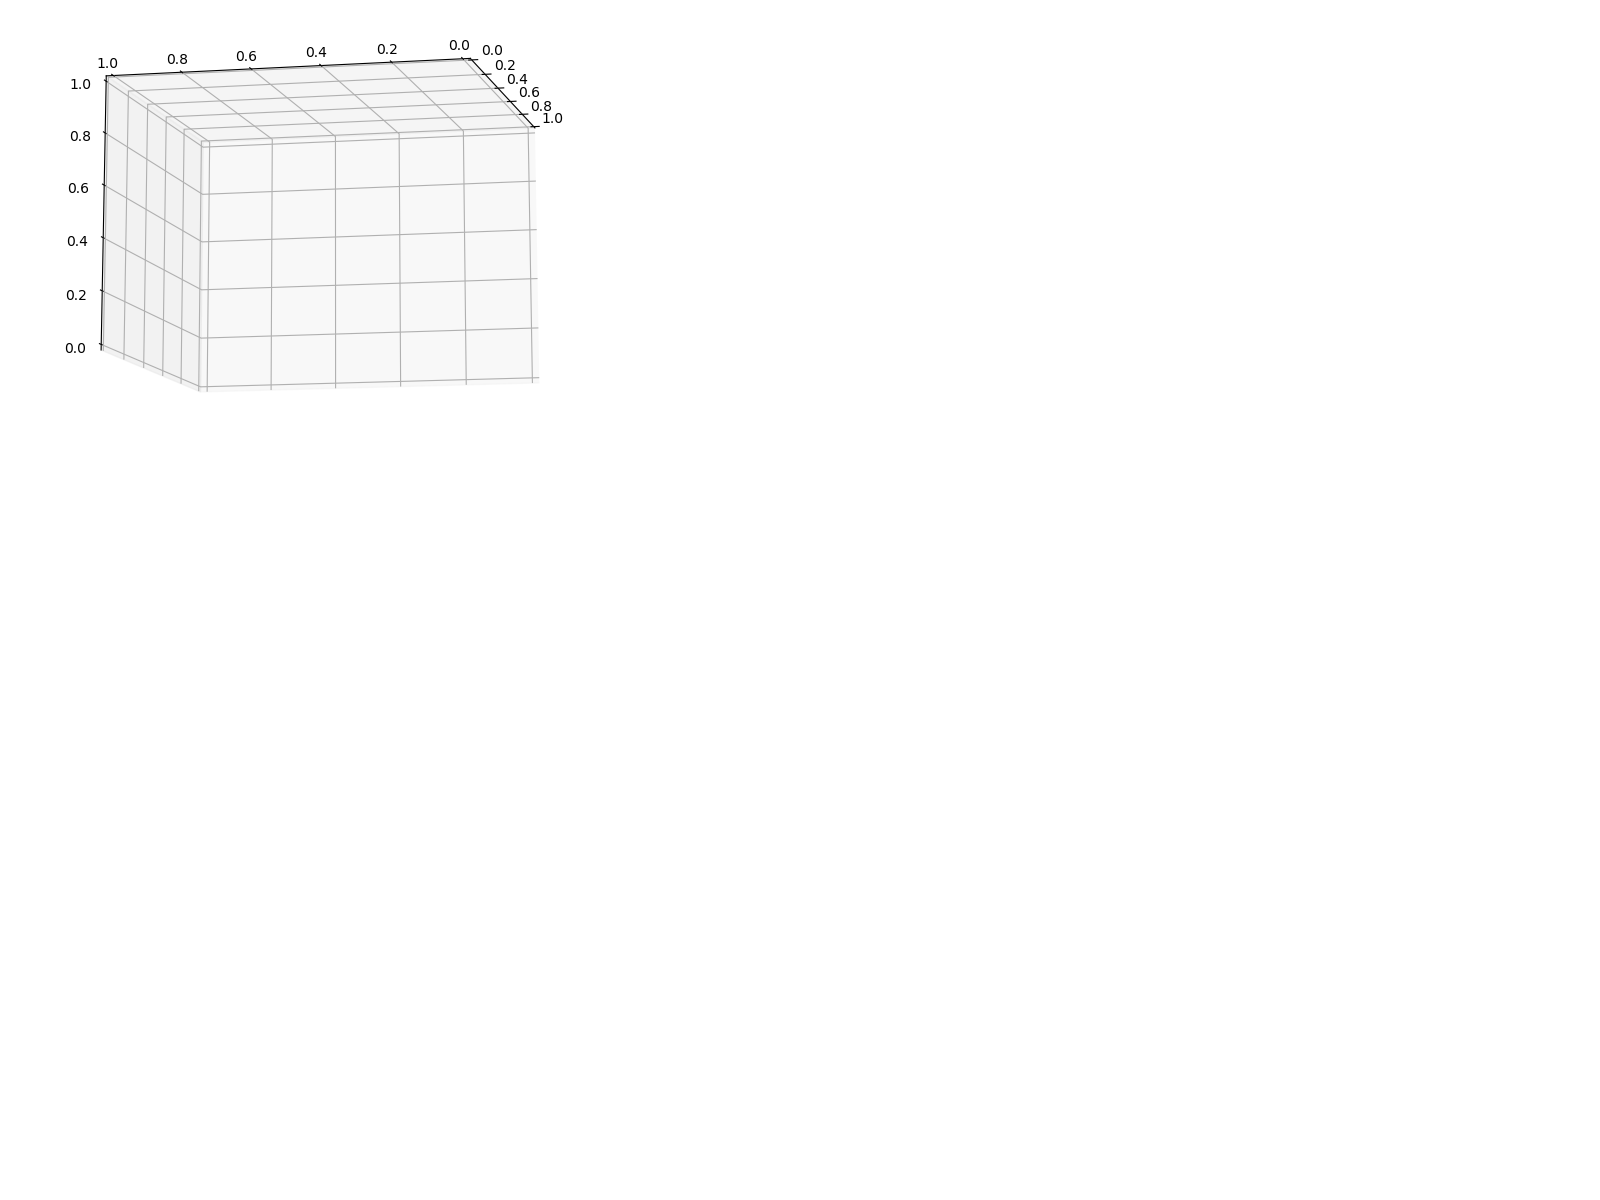

TypeError: Input z must be at least a 2x2 array.

In [35]:
plot3d(lambda x, y: (x * x + y * y) ** 0.5, -1e-6, 1e-6)